# Terry Stop Classification Model

A Terry Stop, also known as a "Stop, Question, and Frisk" or a "Stop and Frisk" is based on the Supreme Court case *Terry V. Ohio*. The court in Terry held that a stop and frisk must comply with the Fourth Amendment, meaning that the stop-and-frisk cannot be unreasonable.

![Stop and frisk](./data/th.jpg)

A reasonable stop-and-frisk is one in which a reasonably prudent office is endangered. He/she may make a reasonable search for weapons of the person believed by him to be armed and dangerous.

When an officer has a *reasonable suspicion* that an individual is armed, engaged in, or about to be engaged in criminal conduct, the office may briefly stop and detain an individual for a *pat-down*

In a traffic stop setting, the Terry condition of a lawful investigatory stop is met whenever it is lawful for the police to detain an automobile and its occupants pending inquiry into a vehicular violation. The police do not need to believe that any occupant of the vehicle is involved in criminal activity. The reasonable suspicion of criminal activities discovered during the traffic stop may give rise to a Terry stop.

## Exlporatory Data Analysis
We'll use a number of Datasets, Seattle PD and NYPD. We'll process the data and create a classification that will help predict whether an arrest was made after a Terry Stop,

### Import the required Datasets and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, roc_curve, auc, mean_absolute_error, root_mean_squared_error, r2_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import tree


#import the seattle PD data and print the first 5 rows
seattle_data = pd.read_csv("./data/Terry_Stops_20241018.csv")
nypd_data = pd.read_excel("./data/NYPD_terry_stops.xlsx")

seattle_data.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,26 - 35,-1,20150000005870,101060,Field Contact,NaN,4980,1962,F,White,...,15:12:00.0000000,-,-,-,WEST PCT 2ND W - QUEEN - PLATOON 1,N,N,-,-,-
1,26 - 35,-1,20150000089918,28823,Arrest,NaN,5143,1957,M,Black or African American,...,19:13:00.0000000,ROBBERY - CRITICAL (INCLUDES STRONG ARM),--ROBBERY - STRONG ARM,911,NaN,N,Y,East,C,C1
2,-,-1,20180000078041,463764,Arrest,NaN,6921,1978,M,Asian,...,04:27:00.0000000,TRESPASS,--WARRANT SERVICES - MISDEMEANOR,911,SOUTH PCT 3RD W - ROBERT - PLATOON 2,N,Y,South,R,R2
3,56 and Above,12770971382,20200000175799,13267969395,Arrest,-,7266,1976,M,White,...,11:17:19.0000000,ASLT - CRITICAL (NO SHOOTINGS),"--ASSAULTS, OTHER",911,WEST PCT 1ST W - KING - PLATOON 1,Y,N,West,K,K1
4,26 - 35,-1,20160000108160,141119,Offense Report,NaN,7288,1984,M,White,...,17:35:00.0000000,"NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)",--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE,911,EAST PCT 2ND W - E/G RELIEF,N,N,East,E,E2


In [2]:
seattle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61555 entries, 0 to 61554
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         61555 non-null  object
 1   Subject ID                61555 non-null  int64 
 2   GO / SC Num               61555 non-null  int64 
 3   Terry Stop ID             61555 non-null  int64 
 4   Stop Resolution           61555 non-null  object
 5   Weapon Type               28990 non-null  object
 6   Officer ID                61555 non-null  object
 7   Officer YOB               61555 non-null  int64 
 8   Officer Gender            61555 non-null  object
 9   Officer Race              61555 non-null  object
 10  Subject Perceived Race    61555 non-null  object
 11  Subject Perceived Gender  61555 non-null  object
 12  Reported Date             61555 non-null  object
 13  Reported Time             61555 non-null  object
 14  Initial Call Type     

In [3]:
seattle_data.describe()

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB
count,6.155500e+04,6.155500e+04,6.155500e+04,61555.000000
mean,7.514672e+09,2.018711e+13,1.258517e+10,1984.135976
std,1.307486e+10,8.549706e+10,1.800415e+10,9.467342
min,-8.000000e+00,-1.000000e+00,2.802000e+04,1900.000000
25%,-1.000000e+00,2.017000e+13,2.413675e+05,1979.000000
50%,-1.000000e+00,2.018000e+13,5.132840e+05,1986.000000
75%,7.755940e+09,2.021000e+13,2.040625e+10,1991.000000
max,6.008468e+10,2.024000e+13,6.008639e+10,2002.000000


In [4]:
seattle_data.isna().sum()

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad                 561
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64

* Based on the dataset description, "Arrest Flag" indicates whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS). We'll use this as our target

In [5]:
seattle_data['Arrest Flag'].value_counts()

Arrest Flag
N    54851
Y     6704
Name: count, dtype: int64

In [6]:
seattle_data['Arrest Flag'].isnull().sum()

0

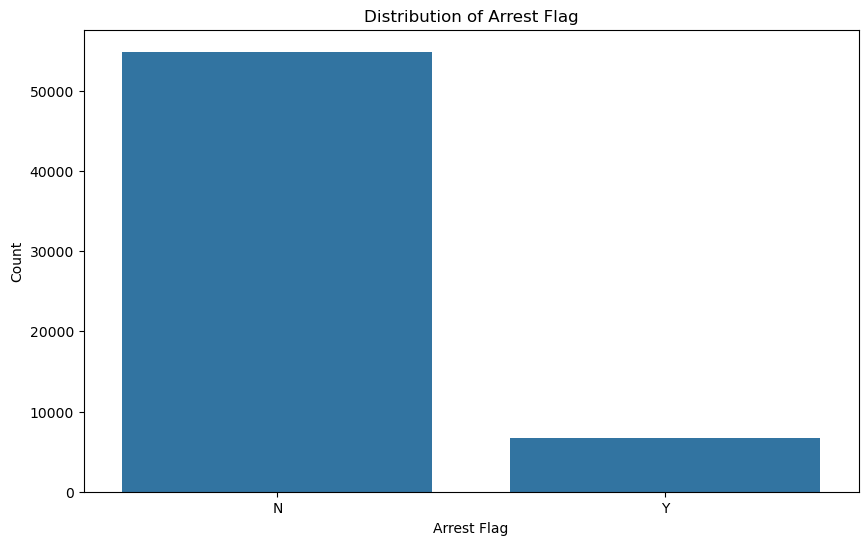

In [7]:
plt.figure(figsize=(10,6))

sns.countplot(data=seattle_data, x=seattle_data['Arrest Flag'])
plt.title("Distribution of Arrest Flag")
plt.xlabel("Arrest Flag")
plt.ylabel("Count")
plt.show()

##  This shows the count of each class in Arrest Flag. A large difference in counts between classes indicates an imbalance.

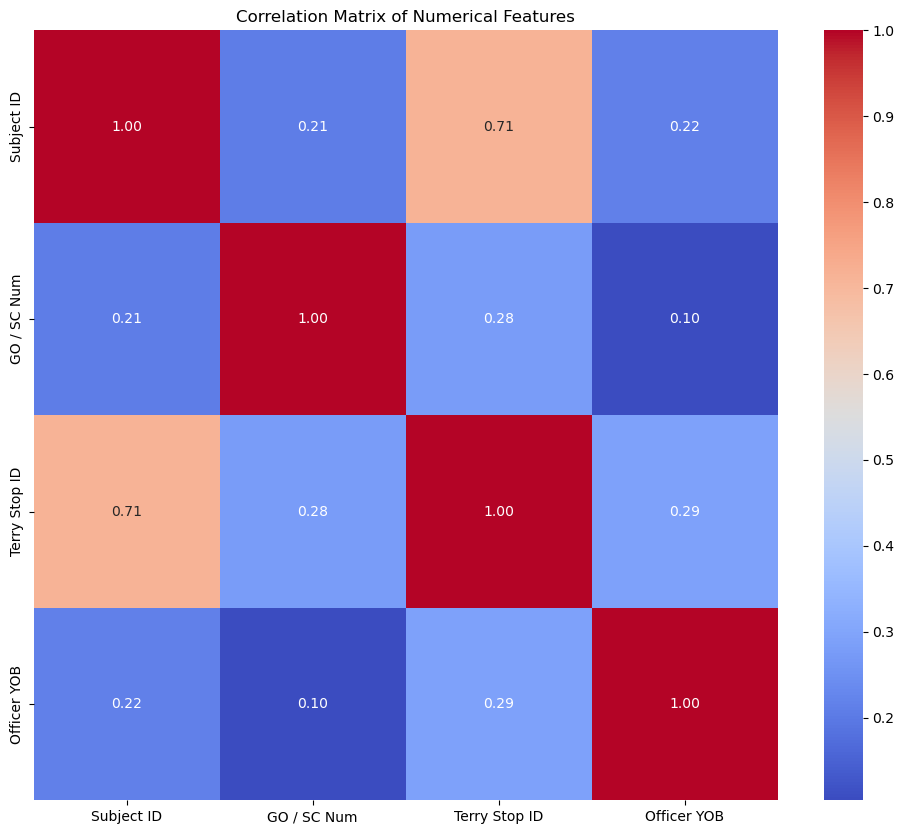

In [8]:
# Calculate correlations for numerical columns only (excluding categorical variables)

numerical_data = seattle_data.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_data.corr()



# Plot heatmap of correlations to identify potential predictors

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix of Numerical Features")

plt.show()

### This heatmap will help identify the strength and direction of relationships between numerical features, which can highlight potential predictors.
* Since there are only a handful of continuous variables, we will need to encoded the categorical variables and find a correlation to the target

In [9]:
features = ['Subject Age Group', 'Weapon Type', 'Officer YOB','Officer Gender', 'Officer Race', 'Subject Perceived Race','Initial Call Type', 'Precinct']

feature_data = seattle_data[features]
X = feature_data
y = seattle_data['Arrest Flag']

In [10]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=3, test_size=0.2)

In [11]:
print(f"X_train for the seattle dataset is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} colums.")
print(f"y_train for seattle dataset is a Series with {y_train.shape[0]} values.")

X_train for the seattle dataset is a DataFrame with 49244 rows and 8 colums.
y_train for seattle dataset is a Series with 49244 values.


In [12]:
X_train.dtypes

Subject Age Group         object
Weapon Type               object
Officer YOB                int64
Officer Gender            object
Officer Race              object
Subject Perceived Race    object
Initial Call Type         object
Precinct                  object
dtype: object

In [13]:
def reformat_columns(data, return_type='dataframe'):
    '''Function that reformat the columns.
    adding an underscore to the naming convention and lowering the font'''
    if isinstance(data, pd.DataFrame):
        # Reformat columns for DataFrame
        formatted_columns = data.rename(columns=lambda x: x.replace(' ', '_').lower())
        if return_type == "dataframe":
            return formatted_columns
        elif return_type == "series":
            return formatted_data.columns.to_series()
        else:
            raise ValueError("return_type must be either 'dataframe' or 'series' when data is a DataFrame.")
            
      # Check if the input is a Series
    elif isinstance(data, pd.Series):
        # Reformat the Series name if it has one
        formatted_columns = data.rename(data.name.replace(' ', '_').lower() if data.name else None)
    return formatted_columns

In [14]:
#Let's change the string style to a more conventional style
X_train = reformat_columns(X_train)
X_train.columns

Index(['subject_age_group', 'weapon_type', 'officer_yob', 'officer_gender',
       'officer_race', 'subject_perceived_race', 'initial_call_type',
       'precinct'],
      dtype='object')

In [15]:
y_train = reformat_columns(y_train)
y_train.name

'arrest_flag'

In [16]:
X_test = reformat_columns(X_test)
X_test.columns

Index(['subject_age_group', 'weapon_type', 'officer_yob', 'officer_gender',
       'officer_race', 'subject_perceived_race', 'initial_call_type',
       'precinct'],
      dtype='object')

In [17]:
y_test = reformat_columns(y_test)
y_test.name

'arrest_flag'

In [18]:
weapons_missing_percentage = (X_train['weapon_type'].isna().sum() / X_train.shape[0]) * 100
# squad_missing_percetnage = (X_train['officer_squad'].isna().sum() / X_train.shape[0]) * 100

print(f"{weapons_missing_percentage:.2f}% of data is missing from the weapon type row")
# print(f"{squad_missing_percetnage:.2f}% of data is missing from the squad row ")

52.91% of data is missing from the weapon type row


We will tackle each column and standardize them

In [19]:
X_train_numeric = X_train.select_dtypes(exclude=['object'])
X_train_numeric.columns

Index(['officer_yob'], dtype='object')

In [20]:
X_train_categorical = X_train.select_dtypes(include=['object'])
X_train_categorical.columns

Index(['subject_age_group', 'weapon_type', 'officer_gender', 'officer_race',
       'subject_perceived_race', 'initial_call_type', 'precinct'],
      dtype='object')

In [21]:
X_test_numeric = X_test.select_dtypes(exclude=['object'])
X_test_numeric.columns

Index(['officer_yob'], dtype='object')

In [22]:
X_test_categorical = X_test.select_dtypes(include=['object'])
X_test_categorical.columns

Index(['subject_age_group', 'weapon_type', 'officer_gender', 'officer_race',
       'subject_perceived_race', 'initial_call_type', 'precinct'],
      dtype='object')

In [23]:
X_train_categorical['subject_age_group'].value_counts().sort_values(ascending=True)

subject_age_group
-                1798
1 - 17           1837
56 and Above     2584
46 - 55          6247
18 - 25          9355
36 - 45         11050
26 - 35         16373
Name: count, dtype: int64

In [24]:
X_train_categorical = X_train_categorical.replace('-',np.nan)
X_test_categorical = X_test_categorical.replace('-', np.nan)
X_train_categorical['subject_age_group'].isna().value_counts()

subject_age_group
False    47446
True      1798
Name: count, dtype: int64

In [25]:
X_test_categorical['subject_age_group'].isna().value_counts()

subject_age_group
False    11891
True       420
Name: count, dtype: int64

In [26]:


imputer = SimpleImputer(strategy='constant', fill_value=None)
imputer.fit(X_train_categorical)

X_train_imputed = imputer.transform(X_train_categorical)

X_test_imputed = imputer.transform(X_test_categorical)

X_train_categorical_imputer = pd.DataFrame(X_train_imputed, columns=X_train_categorical.columns, index=X_train_categorical.index)

X_test_categorical_imputer = pd.DataFrame(X_test_imputed, columns=X_test_categorical.columns, index=X_test_categorical.index)



In [27]:
X_train_categorical_imputer['subject_age_group'].isna()

37396    False
7786     False
16995    False
55912    False
31610    False
         ...  
48056    False
59011    False
11513    False
1688     False
5994     False
Name: subject_age_group, Length: 49244, dtype: bool

In [28]:
for val in X_train_categorical_imputer.columns:
    print(X_train_categorical[[val]].value_counts().sort_values(ascending=True))
    print()

subject_age_group
1 - 17                1837
56 and Above          2584
46 - 55               6247
18 - 25               9355
36 - 45              11050
26 - 35              16373
Name: count, dtype: int64

weapon_type                         
Personal Weapons (hands, feet, etc.)       1
Blackjack                                  1
Brass Knuckles                             1
Automatic Handgun                          2
Shotgun                                    4
Rifle                                      9
Club                                       9
Fire/Incendiary Device                    11
Firearm (unk type)                        13
None/Not Applicable                       16
Taser/Stun Gun                            20
Club, Blackjack, Brass Knuckles           41
Mace/Pepper Spray                         45
Other Firearm                             60
Firearm Other                             85
Firearm                                   95
Blunt Object/Striking Implement     

In [29]:
X_train_categorical_imputer.isna().sum()

subject_age_group         0
weapon_type               0
officer_gender            0
officer_race              0
subject_perceived_race    0
initial_call_type         0
precinct                  0
dtype: int64

In [30]:
ordinal_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, categories=[['1 - 17', '26 - 35', '36 - 45','46 - 55', '55 and Above']])  # Use -1 for unknown categories


X_train_categorical_imputer['subject_age_group_encoded'] = ordinal_enc.fit_transform(
    X_train_categorical_imputer[['subject_age_group']]
)

# Convert the transformed data to a DataFrame
X_train_categorical_ordinal_df = X_train_categorical_imputer[['subject_age_group']]

# Concatenate the original DataFrame with the encoded column
X_train_categorical_encoded = pd.concat(
    [X_train_categorical_imputer, X_train_categorical_ordinal_df], 
    axis=1
)

X_train_categorical_encoded = X_train_categorical_encoded.drop('subject_age_group', axis=1)
# X_train_categorical_encoded = X_train_categorical_encoded.drop('subjec_age_group', axis=1)


X_test_categorical_ordinal = ordinal_enc.transform(X_test_categorical_imputer[['subject_age_group']])

X_test_categorical_ordinal_df = pd.DataFrame(X_test_categorical_ordinal, 
                                             columns=['subject_age_group_encoded'],
                                             index=X_test_categorical_imputer.index)
X_test_categorical_encoded = pd.concat(
    [X_test_categorical, X_test_categorical_ordinal_df], 
    axis=1
)

X_test_categorical_encoded = X_test_categorical_encoded.drop('subject_age_group', axis=1)

X_train_categorical_encoded

,weapon_type,officer_gender,officer_race,subject_perceived_race,initial_call_type,precinct,subject_age_group_encoded
37396,Club,M,White,White,DISTURBANCE,Southwest,-1.0
7786,missing_value,M,Black or African American,Black or African American,UNKNOWN - ANI/ALI - LANDLINE (INCLUDES OPEN LINE),Southwest,1.0
16995,missing_value,M,White,Black or African American,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,North,2.0
55912,missing_value,M,White,Unknown,ASLT - DV CRITICAL,South,1.0
31610,missing_value,M,White,White,AUTO - THEFT/LOSS OF PLATES,West,-1.0
...,...,...,...,...,...,...,...
48056,missing_value,M,White,Unknown,AUTO RECOVERY,North,1.0
59011,missing_value,F,Black or African American,White,PROPERTY - DAMAGE,North,1.0
11513,missing_value,M,Black or African American,White,missing_value,North,1.0
1688,missing_value,M,White,White,DUI - DRIVING UNDER INFLUENCE,East,1.0


In [31]:
X_test_categorical_encoded

,weapon_type,officer_gender,officer_race,subject_perceived_race,initial_call_type,precinct,subject_age_group_encoded
36992,NaN,M,White,White,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",South,2.0
61480,NaN,F,White,Black or African American,NaN,East,2.0
32955,NaN,M,White,White,"OBS WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/D...",North,-1.0
38484,NaN,M,Two or More Races,White,BURN - RECKLESS BURNING,East,1.0
60377,NaN,M,Black or African American,White,PERSON IN BEHAVIORAL/EMOTIONAL CRISIS,West,1.0
...,...,...,...,...,...,...,...
58266,NaN,M,Hispanic,White,NaN,NaN,1.0
46339,NaN,M,White,Black or African American,OBS - BURG - IP/JO - COMM BURG (INCLUDES SCHOOLS),West,2.0
31647,NaN,F,Two or More Races,White,NaN,NaN,-1.0
35209,NaN,M,White,Unknown,BURG - RESD (INCL UNOCC STRUCTURES ON PROP),West,2.0


In [32]:
X_train_categorical_encoded.dtypes

weapon_type                   object
officer_gender                object
officer_race                  object
subject_perceived_race        object
initial_call_type             object
precinct                      object
subject_age_group_encoded    float64
dtype: object

We encoded the groups within 'Subject_Age_Group' Column. The numbers range from 0.0 ('Empty' or no information) to 5.0 (56 and above)

In [33]:
# def impute_missing_values(x, imputer):
#     """
#     Use the imputer to fill in all missing values in the DataFrame
#     """
#     imputed_array = imputer.transform(x)
    
#     imputed_df = pd.DataFrame(imputed_array, columns=x.columns, index=x.index)

#     return imputed_df

# One-Hot Encoder
We'll perform one-hot encoding on the categorical variables

In [34]:
# def encode_and_concat_feature_train(X_train, feature_name):
#     """
#     Transforms training data. Takes the full x DataFram and feature name, makes one-hot encoder,
#     and returns the encoder as well as the DataFrame
#     with that feature transformed into multiple columns of 1s and os.
#     """

#     #make one-hot encoder and fit to the training data
#     ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
#     single_feature_df = X_train[[feature_name]]
#     ohe.fit(single_feature_df)
    
#     #call helper function that actually encodes the feature and concats it
#     X_train = encode_and_concat_feature(X_train, feature_name, ohe)
    
#     return ohe, X_train

In [35]:
# def encode_and_concat_feature(X, feature_name, ohe):
#     """
#     Transforms a feature into multiple columns of 1s and 0s, Used in both training and testing steps. 
#     Takes in the full X dataframe, feature name, and one-hot encoder, and returns the datafram with that feature transofmred into multiple
#     columns of 1s and 0s
#     """
#     #create new one-hot encoded df based on the feature
#     single_feature_df = X[[feature_name]]
#     feature_array = ohe.transform(single_feature_df).toarray()
#     ohe_df = pd.DataFrame(feature_array, columns=ohe.get_feature_names_out(), index=X.index)

#     #drop the old feature from X and concat to the new one-hot encoded df
#     X= X.drop(feature_name, axis=1)
#     X= pd.concat([X, ohe_df], axis=1)

#     return X

In [36]:
X_train_categorical_ordinal_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49244 entries, 37396 to 5994
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subject_age_group  49244 non-null  object
dtypes: object(1)
memory usage: 769.4+ KB


In [37]:
X_train_df = pd.concat([X_train_categorical_encoded, X_train_numeric], axis=1)
X_train_df

,weapon_type,officer_gender,officer_race,subject_perceived_race,initial_call_type,precinct,subject_age_group_encoded,officer_yob
37396,Club,M,White,White,DISTURBANCE,Southwest,-1.0,1981
7786,missing_value,M,Black or African American,Black or African American,UNKNOWN - ANI/ALI - LANDLINE (INCLUDES OPEN LINE),Southwest,1.0,1979
16995,missing_value,M,White,Black or African American,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,North,2.0,1979
55912,missing_value,M,White,Unknown,ASLT - DV CRITICAL,South,1.0,1977
31610,missing_value,M,White,White,AUTO - THEFT/LOSS OF PLATES,West,-1.0,1981
...,...,...,...,...,...,...,...,...
48056,missing_value,M,White,Unknown,AUTO RECOVERY,North,1.0,1996
59011,missing_value,F,Black or African American,White,PROPERTY - DAMAGE,North,1.0,1994
11513,missing_value,M,Black or African American,White,missing_value,North,1.0,1975
1688,missing_value,M,White,White,DUI - DRIVING UNDER INFLUENCE,East,1.0,1974


In [64]:
X_train_df.to_csv('./data/X_train_df.csv')

In [38]:
X_test_df = pd.concat([X_test_categorical_encoded, X_test_numeric], axis=1)
X_test_df

,weapon_type,officer_gender,officer_race,subject_perceived_race,initial_call_type,precinct,subject_age_group_encoded,officer_yob
36992,NaN,M,White,White,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",South,2.0,1986
61480,NaN,F,White,Black or African American,NaN,East,2.0,1984
32955,NaN,M,White,White,"OBS WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/D...",North,-1.0,1976
38484,NaN,M,Two or More Races,White,BURN - RECKLESS BURNING,East,1.0,1995
60377,NaN,M,Black or African American,White,PERSON IN BEHAVIORAL/EMOTIONAL CRISIS,West,1.0,1988
...,...,...,...,...,...,...,...,...
58266,NaN,M,Hispanic,White,NaN,NaN,1.0,1992
46339,NaN,M,White,Black or African American,OBS - BURG - IP/JO - COMM BURG (INCLUDES SCHOOLS),West,2.0,1992
31647,NaN,F,Two or More Races,White,NaN,NaN,-1.0,1992
35209,NaN,M,White,Unknown,BURG - RESD (INCL UNOCC STRUCTURES ON PROP),West,2.0,1978


In [65]:
X_test_df.to_csv('./data/X_test_df.csv')

## Encode the target for the train and test

In [39]:
y_train

37396    N
7786     N
16995    Y
55912    Y
31610    N
        ..
48056    N
59011    N
11513    N
1688     N
5994     N
Name: arrest_flag, Length: 49244, dtype: object

In [40]:
lab_c = LabelEncoder()

y_train_encoded = lab_c.fit_transform(y_train)

y_test_encoded = lab_c.transform(y_test)

y_train_encoded_series = pd.Series(y_train_encoded, index=y_train.index, name=y_train.name)

y_test_encoded_series = pd.Series(y_test_encoded, index=y_test.index, name=y_test.name)

y_train_encoded_series

37396    0
7786     0
16995    1
55912    1
31610    0
        ..
48056    0
59011    0
11513    0
1688     0
5994     0
Name: arrest_flag, Length: 49244, dtype: int32

0 = No, 1 = Yes

In [41]:
y_test_encoded_series

36992    0
61480    0
32955    0
38484    1
60377    0
        ..
58266    0
46339    1
31647    0
35209    0
620      0
Name: arrest_flag, Length: 12311, dtype: int32

### Based on the heatmap. We can see that the best correlation in regards to the target is "Stop Resolution", "Reported date", "Final Call Type", "call type", and finally "weapon type"

In [42]:
# train_features = X_train_categorical_ordinal_df[['stop_resolution','weapon_type','reported_date','call_type','final_call_type']]
# test_features = X_test_categorical_ordinal_df[['stop_resolution','weapon_type','reported_date','call_type','final_call_type']]

In [43]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train_df)


# X_test_scaled = scaler.transform(X_test_df)

# X_train_scaled

In [44]:
# One-Hot Encoding on the ordinal encoded training data

ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

# Ensure only the columns without unknown values are passed to OneHotEncoder
X_train_encoder = ohe.fit_transform(X_train_df)

# Transform the test data, handling unknown categories
# X_test_categorical_ordinal = ordinal_enc.transform(X_test_categorical)

# Replace -1 with a known category or drop the rows with unknown categories
# X_test_categorical_ordinal_df = pd.DataFrame(
#     X_test_categorical_ordinal, 
#     columns=X_test_categorical.columns,
#     index=X_test_categorical.index
# )

# Optionally, replace -1 with a specific known category (e.g., 'unknown')
# X_test_df = X_test_df.replace(-1, 0)  # or any valid category

# Apply One-Hot Encoding to the test data
X_test_encoder = ohe.transform(X_test_df)

# Get the encoded feature names
encoded_columns = ohe.get_feature_names_out(input_features=X_train_df.columns)

# Convert to DataFrames
X_train_encoded_df = pd.DataFrame(X_train_encoder, columns=encoded_columns, index=X_train_categorical_ordinal_df.index)
X_test_encoded_df = pd.DataFrame(X_test_encoder, columns=encoded_columns, index=X_test_categorical_ordinal_df.index)

X_test_encoded_df

C:\Users\omend\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,weapon_type_Blackjack,weapon_type_Blunt Object/Striking Implement,weapon_type_Brass Knuckles,weapon_type_Club,"weapon_type_Club, Blackjack, Brass Knuckles",weapon_type_Fire/Incendiary Device,weapon_type_Firearm,weapon_type_Firearm (unk type),weapon_type_Firearm Other,weapon_type_Handgun,...,officer_yob_1993,officer_yob_1994,officer_yob_1995,officer_yob_1996,officer_yob_1997,officer_yob_1998,officer_yob_1999,officer_yob_2000,officer_yob_2001,officer_yob_2002
36992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
X_train_encoded_df.to_csv('./data/X_train_df.csv')

In [67]:
X_test_encoded_df.to_csv('./data/X_test_df.csv')

In [45]:
# Calculate correlations for each feature in X_train_encoded_df with y_train_encoded_series
target_correlation = X_train_encoded_df.corrwith(y_train_encoded_series)

# Convert to DataFrame for easier visualization
correlation_df = target_correlation.to_frame(name="Correlation with Target")

# Get the top 5 features with the closest (highest absolute) correlation to the target
top_10_features = correlation_df['Correlation with Target'].abs().nlargest(15).index
top_10_correlation_df = correlation_df.loc[top_10_features].sort_values(by="Correlation with Target", ascending=False)


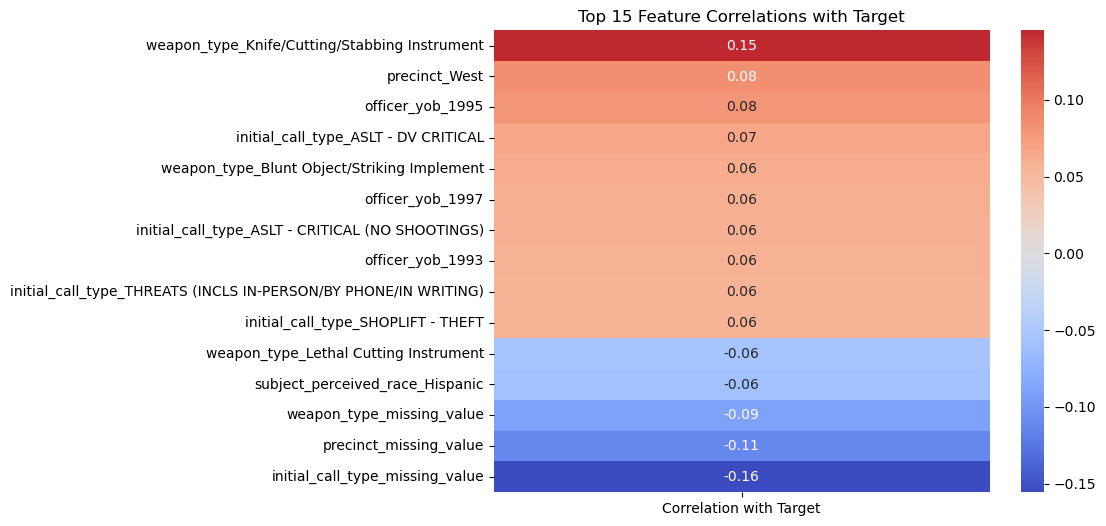

In [46]:
# Plot the correlations of top 5 features
plt.figure(figsize=(8, 6))
sns.heatmap(top_10_correlation_df, annot=True, cmap="coolwarm", center=0, cbar=True, fmt=".2f")
plt.title("Top 15 Feature Correlations with Target")
plt.show()

## Train a vanilla classfier

We will use a decision tree, since there are a large number of categorical columns that required One-hot encoding

In [47]:
logreg = LogisticRegression(random_state=23, max_iter=1000)

logreg.fit(X_train_encoded_df, y_train_encoded_series)

y_predict = logreg.predict(X_test_encoded_df)

# Calculate evaluation metrics
logreg_accuracy = accuracy_score(y_test_encoded_series, y_predict)
logreg_precision = precision_score(y_test_encoded_series, y_predict, pos_label=1)
logreg_recall = recall_score(y_test_encoded_series, y_predict, pos_label=1)
logreg_f1 = f1_score(y_test_encoded_series, y_predict, pos_label=1)

# Probabilities
y_probabilites = logreg.predict_proba(X_test_encoded_df)[:,1]

false_positive, true_positive, thresholds = roc_curve(y_test_encoded_series, y_probabilites)

roc_auc = auc(false_positive, true_positive)

# Display results
print("Accuracy:", logreg_accuracy)
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1 Score:", logreg_f1)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
logreg_conf_matrix = confusion_matrix(y_test_encoded_series, y_predict)
print("Confusion Matrix:\n", logreg_conf_matrix)

Accuracy: 0.8950532044513038
Precision: 0.4916387959866221
Recall: 0.11421911421911422
F1 Score: 0.1853720050441362
ROC AUC Score: 0.7643974212370439
Confusion Matrix:
 [[10872   152]
 [ 1140   147]]


In [68]:
y_probabilites

array([0.12691232, 0.13506893, 0.04778955, ..., 0.16523355, 0.28163928,
       0.20375373])

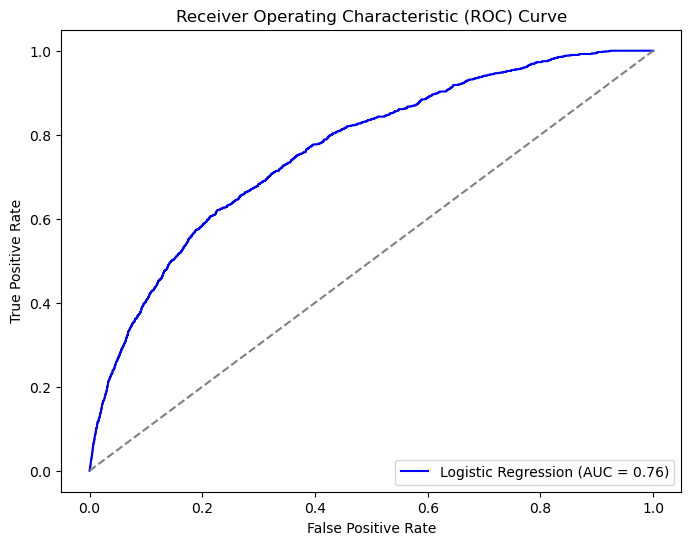

ROC AUC Score: 0.7643974212370439


In [48]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_positive, true_positive, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Display AUC score
print("ROC AUC Score:", roc_auc)

In [71]:
y_test_encoded_series.to_csv('./data/y_test.csv')


In [72]:
y_probabilities_df = pd.DataFrame(y_probabilities, columns=['Predicted_Probability'])

# Export to CSV
y_probabilities_df.to_csv('y_probabilities.csv', index=False)

In [49]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=3, max_depth=5).fit(X_train_encoded_df, y_train_encoded_series)

### Make Predictions

In [50]:
#make predictions
y_pred = dt.predict(X_test_encoded_df)

In [51]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test_encoded_series, y_pred)}")
print(f"Mean Squared Error: {np.sum(np.power(y_test_encoded_series - y_pred, 2))/len(y_test_encoded)}")
print(f"Root Squared Mean Error: {root_mean_squared_error(y_test_encoded_series, y_pred)}")
print(f"R-Squared: {r2_score(y_test_encoded_series, y_pred)}")



Mean Absolute Error: 0.10559662090813093
Mean Squared Error: 0.10559662090813093
Root Squared Mean Error: 0.32495633692564135
R-Squared: -0.128025538402897


In [52]:

# Accuracy
accuracy = accuracy_score(y_test_encoded_series, y_pred)

precision = precision_score(y_test_encoded_series, y_pred)

recall = recall_score(y_test_encoded_series, y_pred)

f1 = f1_score(y_test_encoded_series, y_pred)

confus_matrix = confusion_matrix(y_test_encoded_series,y_pred)

print(f"Accuracy: {accuracy}\n")
print(f"Precision: {precision}\n")
print(f"Recall: {recall}\n")
print(f"F1-Score: {f1}\n")
print("\nConfusion Matrix")
print(confus_matrix)

Accuracy: 0.8944033790918691

Precision: 0.40298507462686567

Recall: 0.02097902097902098

F1-Score: 0.03988183161004431


Confusion Matrix
[[10984    40]
 [ 1260    27]]


In [53]:
# check the AUC of predictions
fpr, tpr, thresholds = roc_curve(y_test_encoded_series, y_pred)
roc_auc = auc(fpr,tpr)
roc_auc

0.5086752869771738

In [54]:
cv_scores = cross_val_score(dt, X_train_encoded_df, y_train_encoded_series, cv=5, scoring="accuracy")
print(f"Cross-validated accuracy score: {cv_scores}")
print(f"Mean Score: {cv_scores.mean()}")
print(f"Standard Deviation scores: {cv_scores.std()}")

Cross-validated accuracy score: [0.889735   0.88953193 0.88993806 0.89024266 0.89073924]
Mean Score: 0.890037379210811
Standard Deviation scores: 0.00042226049148524024


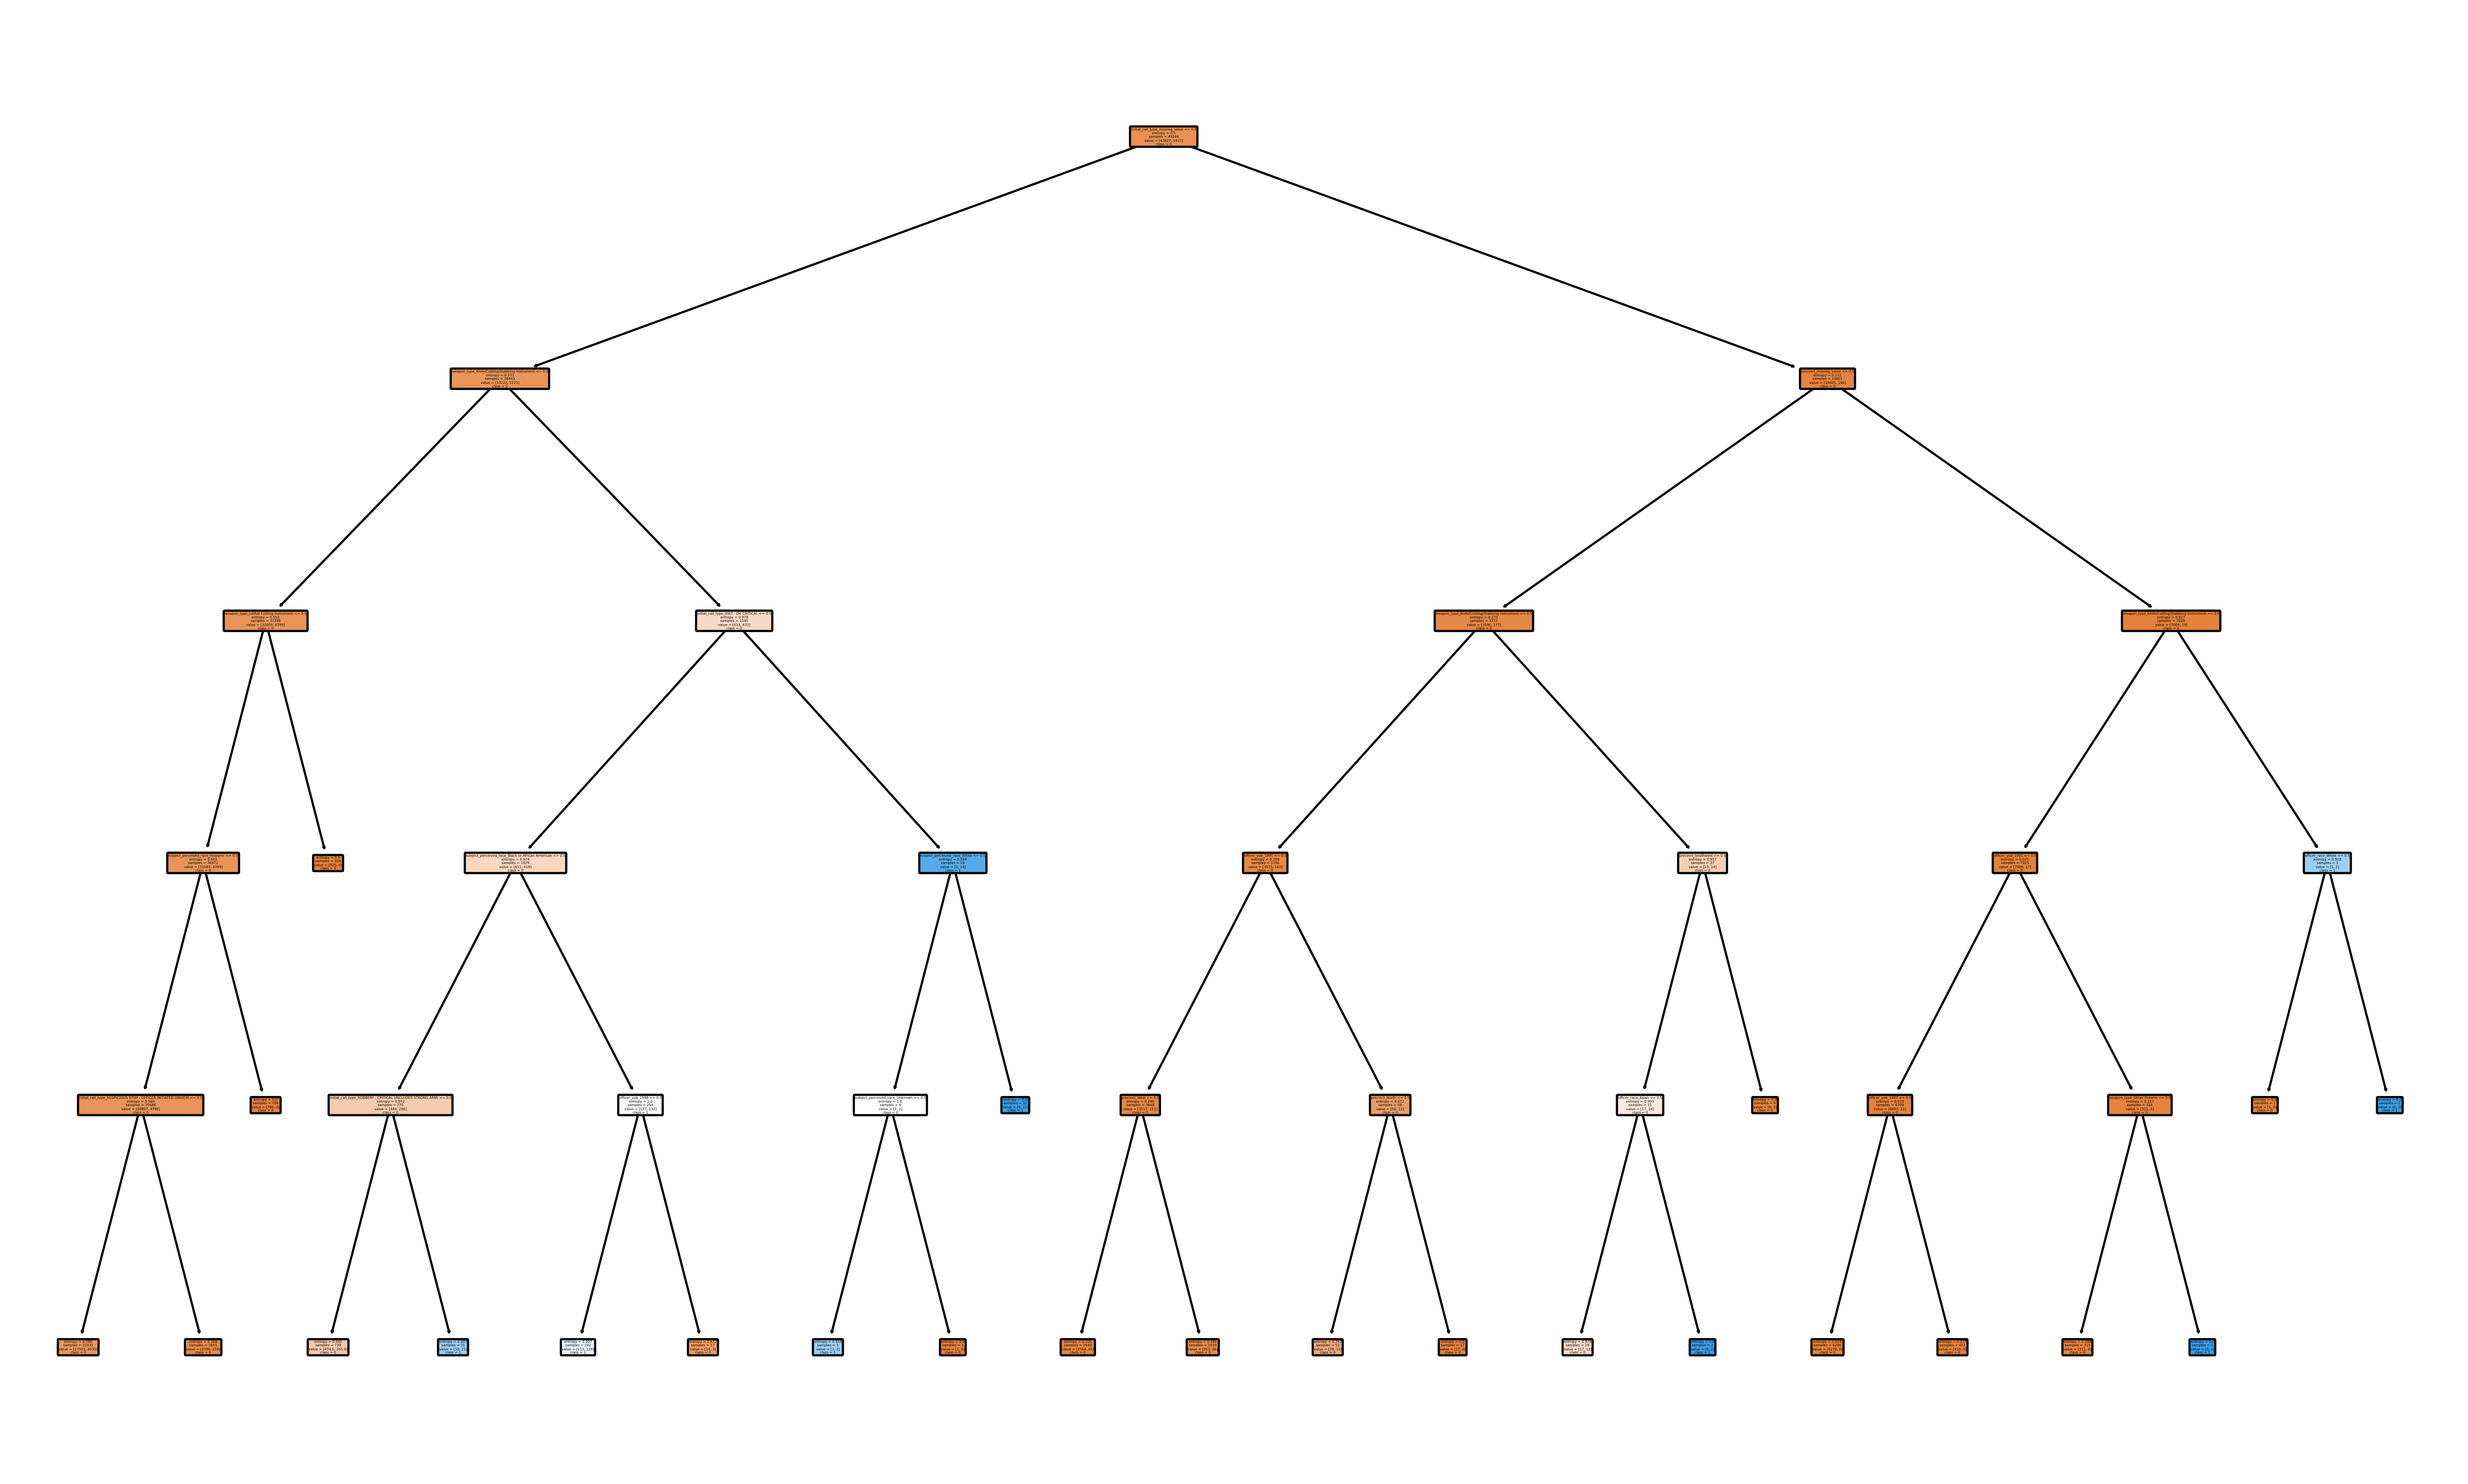

In [55]:
# from sklearn import tree
plt.figure(figsize=(20,12), dpi=500)
tree.plot_tree(dt,
              feature_names=X_train_encoded_df.columns,
              class_names=np.unique(y_train_encoded_series).astype('str'),
              filled=True,
              rounded=True,
              max_depth=10)
plt.show()

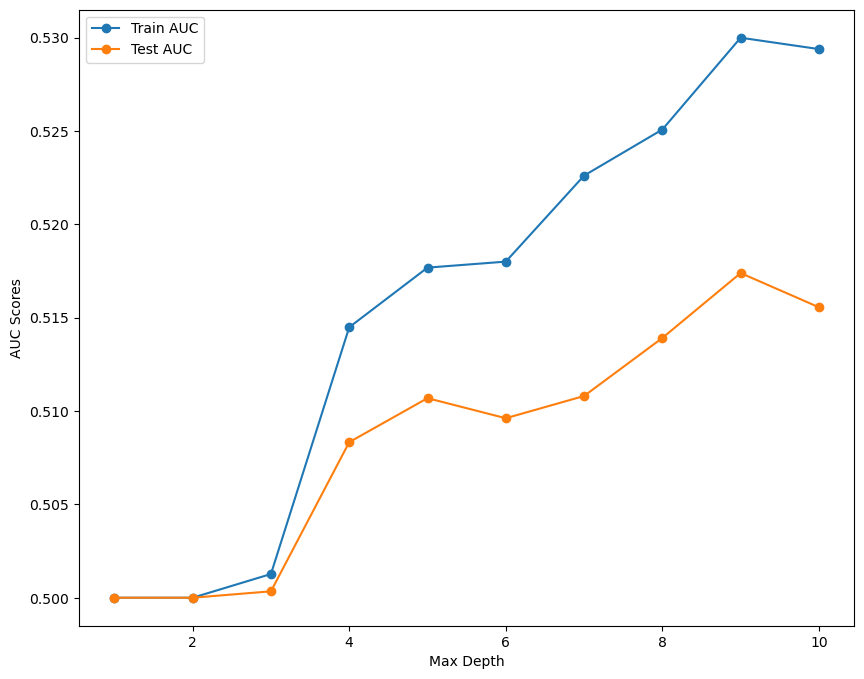

In [56]:
max_depth_values = np.arange(1,11)

train_aucs = []
test_aucs = []

for depth in max_depth_values:
    #Intialize predicted probabilities for training and test sets
    clf = DecisionTreeClassifier(max_depth=depth, random_state=3)
    clf.fit(X_train_encoded_df, y_train_encoded_series)
    
    # Get predicted probabilities for training and test sets
    y_train_prob = clf.predict(X_train_encoded_df)
    y_test_prob = clf.predict(X_test_encoded_df)
    # y_train_prob = clf.predict_proba(X_train_encoded_df)[:,1]
    # y_test_prob = clf.predict_proba(X_test_encoded_df)[:,1]
    
    # Calculate FPR (False Positive Rate), TPR(True Positive Rate) and test sets using roc_curve
    fpr_train, tpr_train, _ = roc_curve(y_train_encoded_series, y_train_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test_encoded_series, y_test_prob)
    
    # Calculate AUC absed on FPR and TPR using auc
    train_auc = auc(fpr_train, tpr_train)
    test_auc = auc(fpr_test, tpr_test)
    
    # Append AUC to the list
    train_aucs.append(train_auc)
    test_aucs.append(test_auc)


# PLot the figure
plt.figure(figsize=(10,8))
plt.plot(max_depth_values, train_aucs, label="Train AUC", marker="o")
plt.plot(max_depth_values, test_aucs, label="Test AUC", marker="o")
plt.xlabel("Max Depth")
plt.ylabel("AUC Scores")
plt.legend()
plt.show()

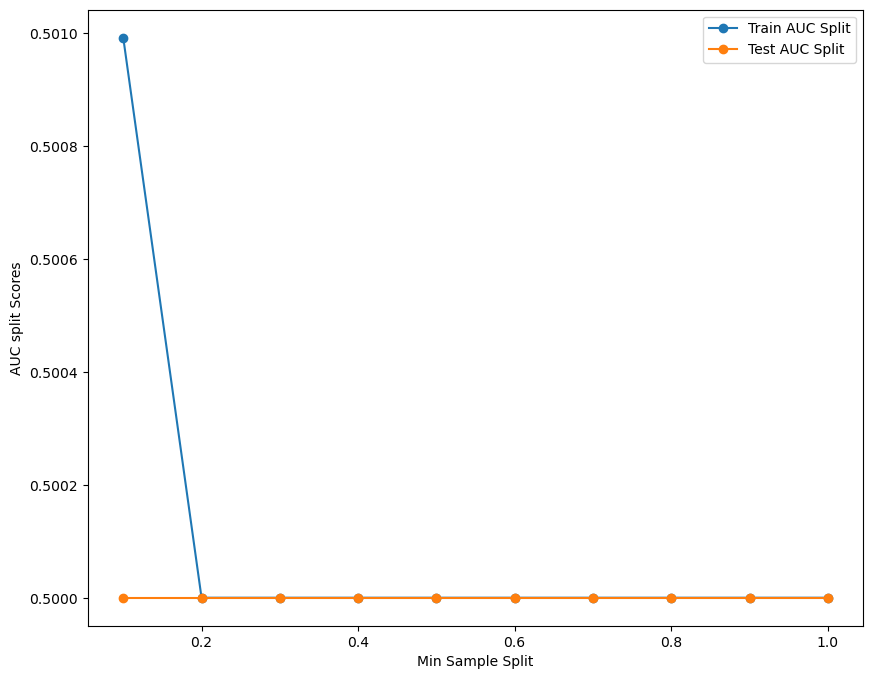

In [57]:
# identify the optimal min-samples-split 
min_sample_splits_value = np.arange(0.1,1.1,0.1)
train_auc_splits = []
test_auc_splits = []

for split in min_sample_splits_value:
    clf_split = DecisionTreeClassifier(min_samples_split=split, random_state=3)
    clf_split.fit(X_train_encoded_df, y_train_encoded_series)

    y_train_probs = clf_split.predict(X_train_encoded_df)
    y_test_probs = clf_split.predict(X_test_encoded_df)
    # y_train_probs = clf_split.predict_proba(X_train_encoded_df)[:,1]
    # y_test_probs = clf_split.predict_proba(X_test_encoded_df)[:,1]

    fpr_train_split, tpr_train_split, _ = roc_curve(y_train_encoded_series, y_train_probs)
    fpr_test_split, tpr_test_split, _ = roc_curve(y_test_encoded_series, y_test_probs)

    train_auc_split = auc(fpr_train_split, tpr_train_split)
    test_auc_split = auc(fpr_test_split, tpr_test_split)
    
    train_auc_splits.append(train_auc_split)
    test_auc_splits.append(test_auc_split)


plt.figure(figsize=(10,8))
plt.plot(min_sample_splits_value, train_auc_splits, label="Train AUC Split", marker="o")
plt.plot(min_sample_splits_value, test_auc_splits, label="Test AUC Split", marker="o")
plt.xlabel("Min Sample Split")
plt.ylabel("AUC split Scores")
plt.legend()
plt.show()

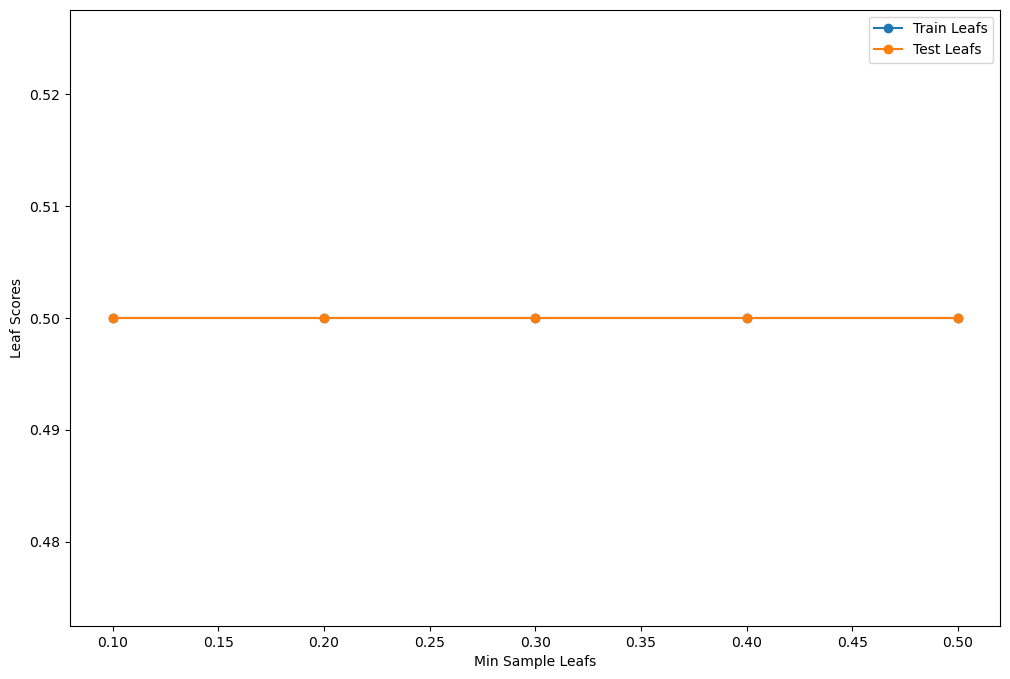

In [58]:
min_sample_leafs_values = np.arange(0.1,0.6,0.1)
train_auc_leafs = []
test_auc_leafs = []

for leaf in min_sample_leafs_values:
    #instantiate the classifier
    clf_leaf = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=3)
    clf_leaf.fit(X_train_encoded_df, y_train_encoded_series)

    y_train_leaf_pred_prob = clf_leaf.predict(X_train_encoded_df)
    y_test_leaf_pred_prob = clf_leaf.predict(X_test_encoded_df)

    # predict probabilities
    # y_train_leaf_pred_prob = clf_leaf.predict_proba(X_train_encoded_df)[:,1]
    # y_test_leaf_pred_prob = clf_leaf.predict_proba(X_test_encoded_df)[:,1]

    # get the false positive and true positive values
    fpr_train_leaf, tpr_train_leaf, _ = roc_curve(y_train_encoded_series, y_train_leaf_pred_prob)
    fpr_test_leaf, tpr_test_leaf, _ = roc_curve(y_test_encoded_series, y_test_leaf_pred_prob)

    # Get the AUC
    train_auc_leaf = auc(fpr_train_leaf, tpr_train_leaf)
    test_auc_leaf = auc(fpr_test_leaf, tpr_test_leaf)

    train_auc_leafs.append(train_auc_leaf)
    test_auc_leafs.append(test_auc_leaf)

plt.figure(figsize=(12,8))
plt.plot(min_sample_leafs_values, train_auc_leafs, label="Train Leafs", marker="o")
plt.plot(min_sample_leafs_values, test_auc_leafs, label="Test Leafs", marker="o")
plt.xlabel("Min Sample Leafs")
plt.ylabel("Leaf Scores")
plt.legend()
plt.show()


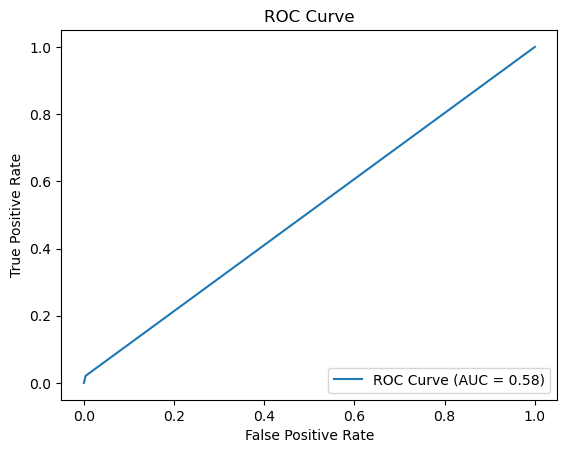

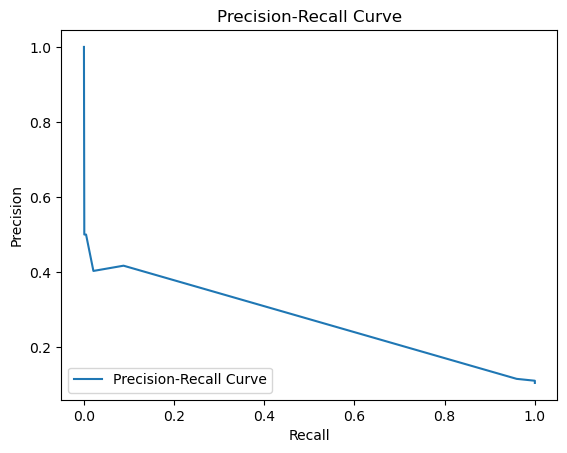

In [59]:
# Calculate probabilities for ROC and Precision-Recall

from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

y_probs = dt.predict_proba(X_test_encoded_df)[:, 1]

# ROC curve
# fpr, tpr, _ = roc_curve(y_test_encoded_series, y_probs)
plt.plot(fpr, tpr, label="ROC Curve (AUC = %0.2f)" % roc_auc_score(y_test_encoded_series, y_probs))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_encoded_series, y_probs)
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

In [60]:
seattle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61555 entries, 0 to 61554
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         61555 non-null  object
 1   Subject ID                61555 non-null  int64 
 2   GO / SC Num               61555 non-null  int64 
 3   Terry Stop ID             61555 non-null  int64 
 4   Stop Resolution           61555 non-null  object
 5   Weapon Type               28990 non-null  object
 6   Officer ID                61555 non-null  object
 7   Officer YOB               61555 non-null  int64 
 8   Officer Gender            61555 non-null  object
 9   Officer Race              61555 non-null  object
 10  Subject Perceived Race    61555 non-null  object
 11  Subject Perceived Gender  61555 non-null  object
 12  Reported Date             61555 non-null  object
 13  Reported Time             61555 non-null  object
 14  Initial Call Type     

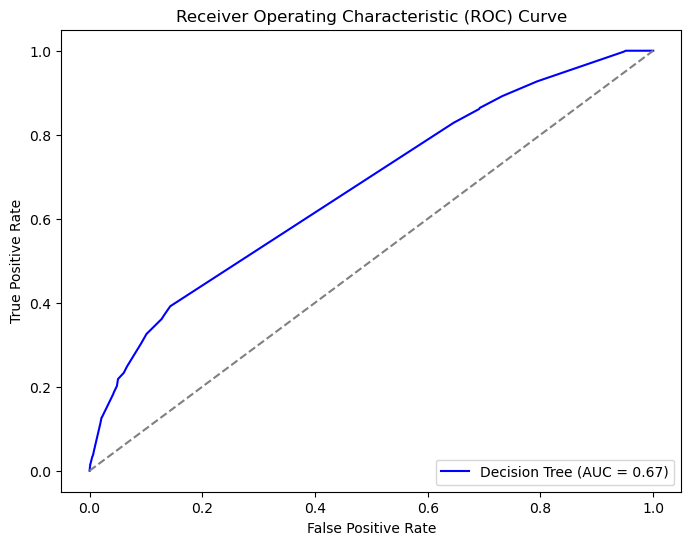

Accuracy: 0.8947282917715864
Precision: 0.45161290322580644
Recall: 0.03263403263403263
F1 Score: 0.06086956521739131
ROC AUC Score: 0.6721742164866258


In [63]:
# Manually set hyperparameters for implicit pruning
pruned_tree_clf = DecisionTreeClassifier(
    max_depth=15,             # limit the depth of the tree
    min_samples_split=10,      # require at least 10 samples to split a node
    min_samples_leaf=5,        # require at least 5 samples at each leaf node
    max_leaf_nodes=50,         # limit the total number of leaf nodes
    random_state=9
)

# Train the model
pruned_tree_clf.fit(X_train_encoded_df, y_train_encoded_series)

# Evaluate the model
y_probabilities = pruned_tree_clf.predict_proba(X_test_encoded_df)[:, 1]
fpr3, tpr3, thresholds = roc_curve(y_test_encoded_series, y_probabilities)
roc_auc = roc_auc_score(y_test_encoded_series, y_probabilities)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, color='blue', label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print model performance metrics
y_pred = pruned_tree_clf.predict(X_test_encoded_df)
print("Accuracy:", accuracy_score(y_test_encoded_series, y_pred))
print("Precision:", precision_score(y_test_encoded_series, y_pred, pos_label=1))
print("Recall:", recall_score(y_test_encoded_series, y_pred, pos_label=1))
print("F1 Score:", f1_score(y_test_encoded_series, y_pred, pos_label=1))
print("ROC AUC Score:", roc_auc)
